In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import VAR
from pandas.plotting import register_matplotlib_converters

from datetime import datetime 

In [168]:
values = pd.read_csv("../data/kalshi_features_v1.csv")
values.shape

(1329, 32)

In [169]:
values.head()

,Date,DayOfWeek,Open,High,Low,Close,Adj Close,Volume,OC Difference,HL Difference,...,ShortEMA,LongEMA,MACD,SignalLine,MACD_Histogram,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5
0,2023-12-04,1,15837.09961,15844.65723,15695.58398,15773.00098,15773.00098,526945041,64.09863,149.07325,...,15851.888782,15603.993792,247.894990,268.219121,-20.324132,15997.58008,15947.87012,15987.59961,16010.42969,15961.98047
1,2023-12-01,5,15892.58984,16013.75000,15834.92969,15997.58008,15997.58008,5607000000,-104.99024,178.82031,...,15866.232019,15590.473217,275.758802,273.300154,2.458647,15947.87012,15987.59961,16010.42969,15961.98047,15982.00977
2,2023-11-30,4,15987.66016,16013.48047,15825.66992,15947.87012,15947.87012,5678070000,39.79004,187.81055,...,15842.350553,15557.904668,284.445885,272.685493,11.760393,15987.59961,16010.42969,15961.98047,15982.00977,16001.38965
3,2023-11-29,3,16111.36035,16166.50977,15976.69043,15987.59961,15987.59961,4890220000,123.76074,189.81934,...,15823.165178,15526.707432,296.457746,269.745394,26.712351,16010.42969,15961.98047,15982.00977,16001.38965,15933.62012
4,2023-11-28,2,15940.29004,16031.51953,15921.07031,16010.42969,16010.42969,4474400000,-70.13965,110.44922,...,15793.268008,15489.836058,303.431950,263.067307,40.364644,15961.98047,15982.00977,16001.38965,15933.62012,16027.05957


# Time Series

#### Problem Statement
**We aim to forecast future stock market Open and Close prices based on historical data. The objectives are two-fold:**
1) Predict the Open and Close prices for the next few days based on previous price data and other related financial indicators.
2) Given only the Open price for a future date, predict the corresponding Close price.

#### Steps to Take
1. Data Preprocessing
2. EDA (If Needed)
3. Model Selection
4. Feature Selection
5. Evaluation

## Data Preprocessing

In [170]:
values_ts = values

In [171]:
values_ts['Date'] = pd.to_datetime(values['Date'])

In [172]:
values_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1329 non-null   datetime64[ns]
 1   DayOfWeek               1329 non-null   int64         
 2   Open                    1329 non-null   float64       
 3   High                    1329 non-null   float64       
 4   Low                     1329 non-null   float64       
 5   Close                   1329 non-null   float64       
 6   Adj Close               1329 non-null   float64       
 7   Volume                  1329 non-null   int64         
 8   OC Difference           1329 non-null   float64       
 9   HL Difference           1329 non-null   float64       
 10  OC %Change              1329 non-null   float64       
 11  HL %Change              1329 non-null   float64       
 12  Close_Status            1329 non-null   int64   

In [173]:
values_ts.set_index('Date',inplace=True)

In [174]:
values_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1329 entries, 2023-12-04 to 2018-08-23
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DayOfWeek               1329 non-null   int64  
 1   Open                    1329 non-null   float64
 2   High                    1329 non-null   float64
 3   Low                     1329 non-null   float64
 4   Close                   1329 non-null   float64
 5   Adj Close               1329 non-null   float64
 6   Volume                  1329 non-null   int64  
 7   OC Difference           1329 non-null   float64
 8   HL Difference           1329 non-null   float64
 9   OC %Change              1329 non-null   float64
 10  HL %Change              1329 non-null   float64
 11  Close_Status            1329 non-null   int64  
 12  Close_Difference        1328 non-null   float64
 13  Same Bracket            1329 non-null   int64  
 14  Avg_OC_Spread_10_Day  

In [175]:
values_ts.sort_index(inplace=True)

## NEXT: WE NEED TO GET OUR DATA TO BECOME STATIONERY



## EDA


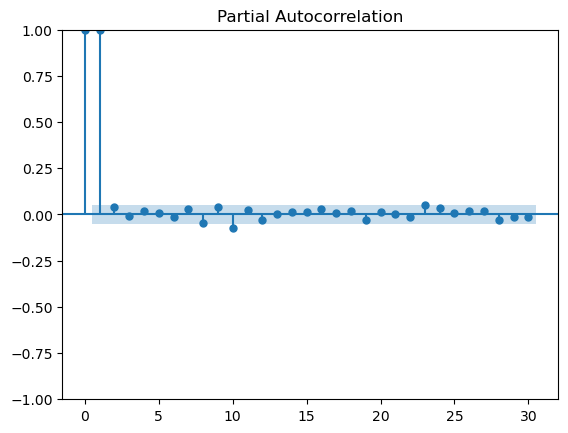

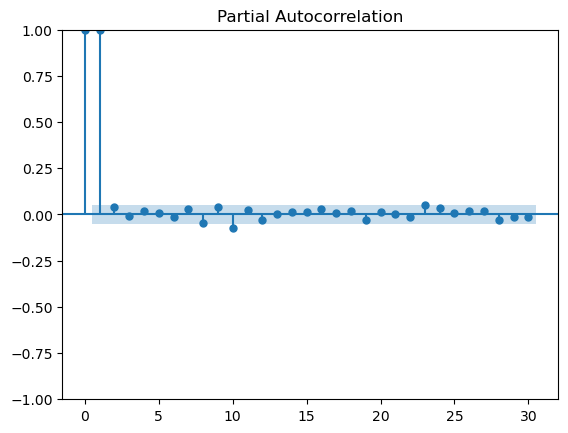

In [176]:
plot_pacf(values_ts['Close'],lags=30)

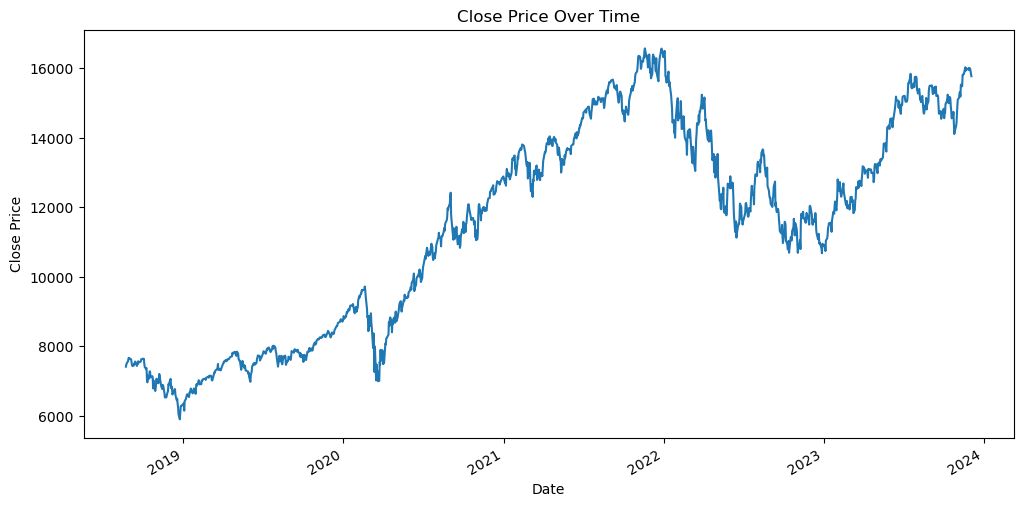

In [177]:
import matplotlib.pyplot as plt

# Plotting the 'Close' column
values_ts['Close'].plot(figsize=(12, 6))
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


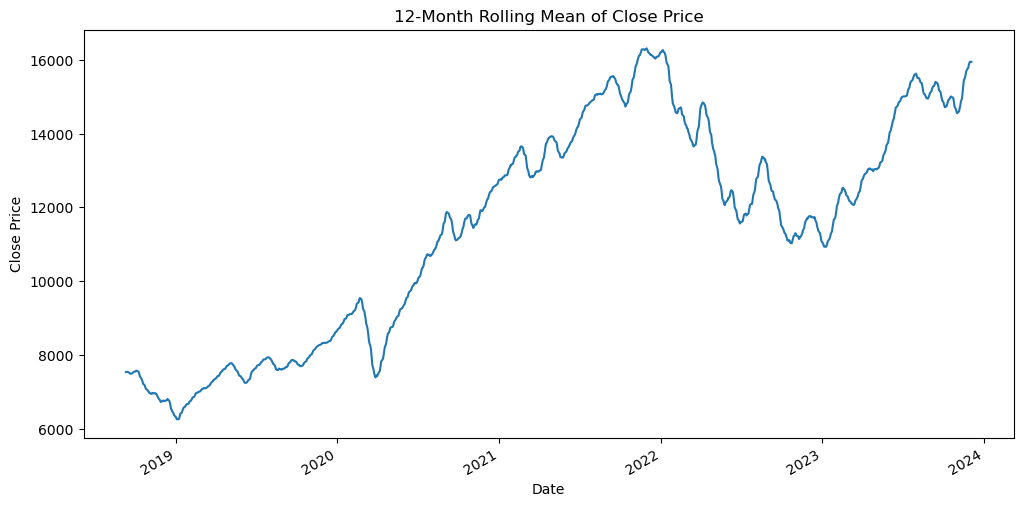

In [178]:
values_ts['Close'].rolling(window=12).mean().plot(figsize=(12, 6))
plt.title('12-Month Rolling Mean of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


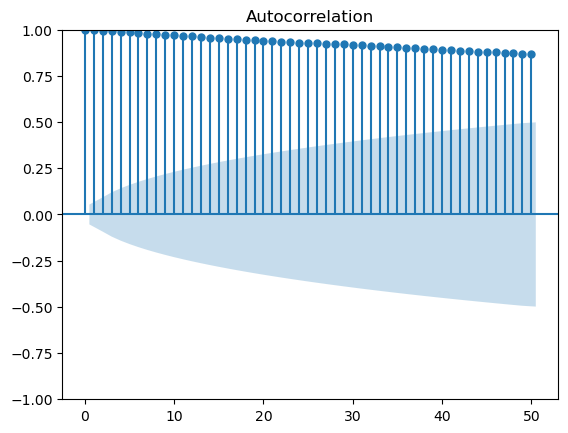

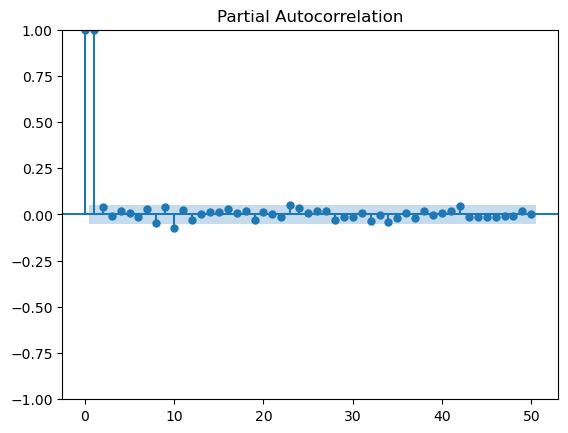

In [179]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(values_ts['Close'], lags=50)
plot_pacf(values_ts['Close'], lags=50)
plt.show()


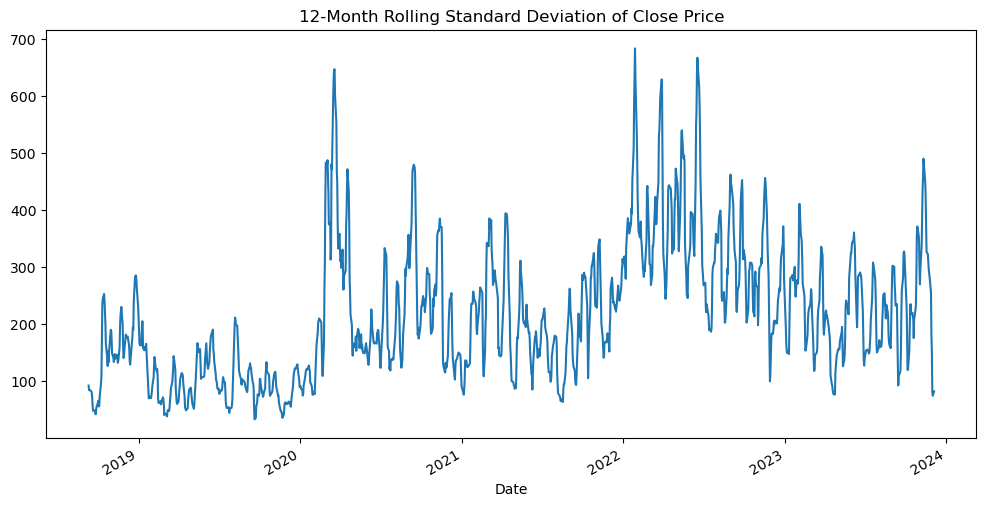

In [180]:
values_ts['Close'].rolling(window=12).std().plot(figsize=(12, 6))
plt.title('12-Month Rolling Standard Deviation of Close Price')
plt.show()


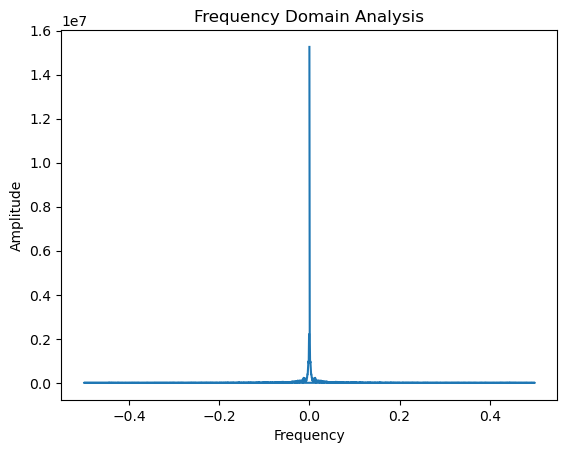

In [181]:
import numpy as np

fft_result = np.fft.fft(values_ts['Close'])
frequencies = np.fft.fftfreq(len(fft_result))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Analysis')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


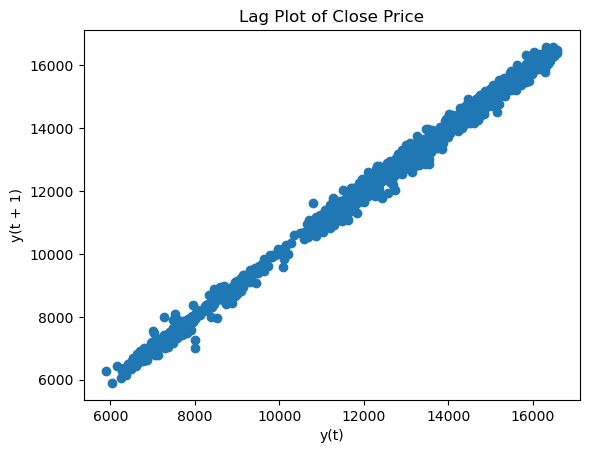

In [182]:
from pandas.plotting import lag_plot

lag_plot(values_ts['Close'])
plt.title('Lag Plot of Close Price')
plt.show()


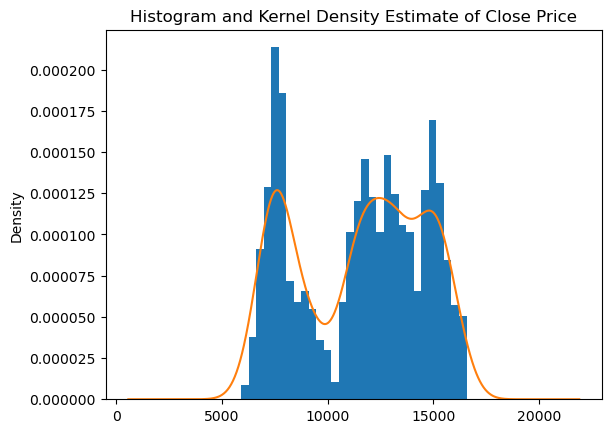

In [183]:
values_ts['Close'].plot(kind='hist', bins=30, density=True)
values_ts['Close'].plot(kind='kde')
plt.title('Histogram and Kernel Density Estimate of Close Price')
plt.show()


## Deep Dive: Relationship between Close and Volume

In [184]:
def crosscorr(datax, datay, lag=0, method='pearson'):
    """ Cross correlation at different lags """
    return datax.corr(datay.shift(lag), method=method)


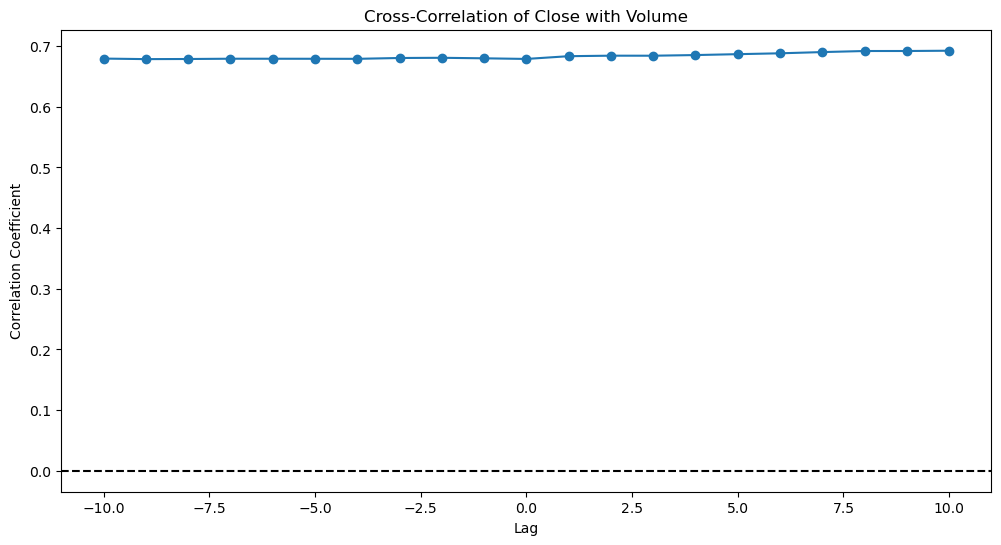

In [185]:
lags = range(-10, 11)  # for example, from -10 to +10 days
cross_corr_values = [crosscorr(values_ts['Close'], values_ts['Volume'], lag) for lag in lags]

plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr_values, marker='o')
plt.axhline(y=0, linestyle='--', color='k')
plt.title('Cross-Correlation of Close with Volume')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.show()


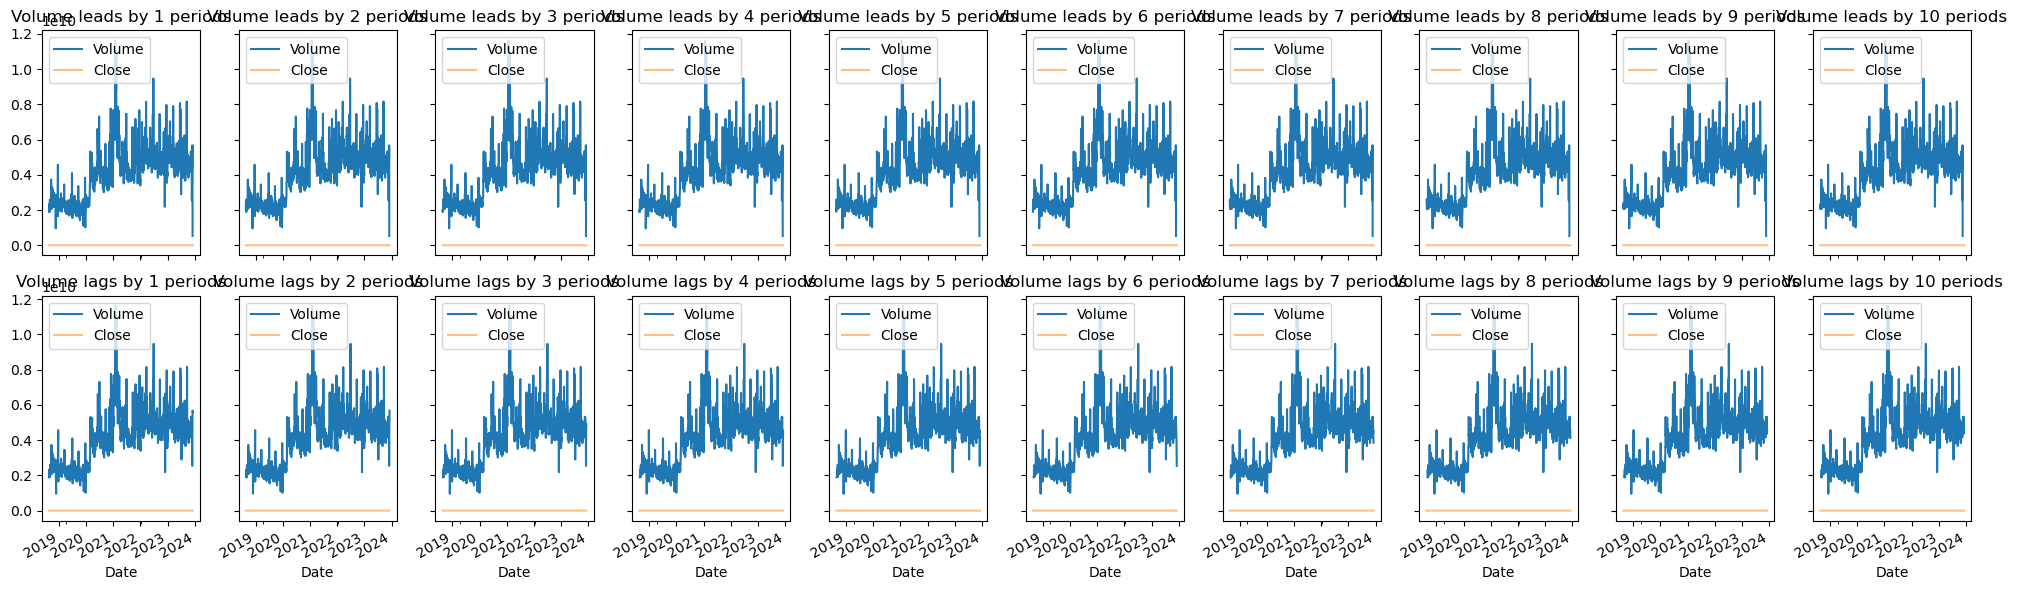

In [186]:
import matplotlib.pyplot as plt

# Assuming 'values_ts' is your DataFrame with 'Close' and 'Volume' columns
max_lag = 10
fig, axes = plt.subplots(2, max_lag, figsize=(20, 6), sharex=True, sharey=True)

# Check for volume leading close
for i in range(max_lag):
    lag = i + 1
    values_ts['Volume'].shift(-lag).plot(ax=axes[0, i], title=f'Volume leads by {lag} periods')
    values_ts['Close'].plot(ax=axes[0, i], alpha=0.5)
    axes[0, i].legend(["Volume", "Close"])

# Check for volume lagging close
for i in range(max_lag):
    lag = i + 1
    values_ts['Volume'].shift(lag).plot(ax=axes[1, i], title=f'Volume lags by {lag} periods')
    values_ts['Close'].plot(ax=axes[1, i], alpha=0.5)
    axes[1, i].legend(["Volume", "Close"])

plt.tight_layout()
plt.show()


In [187]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_test_result = grangercausalitytests(values_ts[['Close', 'Volume']], maxlag=max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7769  , p=0.3783  , df_denom=1325, df_num=1
ssr based chi2 test:   chi2=0.7786  , p=0.3776  , df=1
likelihood ratio test: chi2=0.7784  , p=0.3776  , df=1
parameter F test:         F=0.7769  , p=0.3783  , df_denom=1325, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5179  , p=0.0810  , df_denom=1322, df_num=2
ssr based chi2 test:   chi2=5.0549  , p=0.0799  , df=2
likelihood ratio test: chi2=5.0453  , p=0.0802  , df=2
parameter F test:         F=2.5179  , p=0.0810  , df_denom=1322, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7437  , p=0.1562  , df_denom=1319, df_num=3
ssr based chi2 test:   chi2=5.2589  , p=0.1538  , df=3
likelihood ratio test: chi2=5.2485  , p=0.1545  , df=3
parameter F test:         F=1.7437  , p=0.1562  , df_denom=1319, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5609  , p=0.

/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### NOTE: It appears that the 2 day lag volume is pretty significant to the current close price

In [188]:
"""import statsmodels.api as sm

# Use a lag of your choice based on previous insights
lag = 5
X = values_ts[['Volume']].shift(lag)
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = values_ts['Close']

# Drop NaN values that were created by shifting
X.dropna(inplace=True)
y = y.loc[X.index]

model = sm.OLS(y, X).fit()
print(model.summary())
"""

"import statsmodels.api as sm\n\n# Use a lag of your choice based on previous insights\nlag = 5\nX = values_ts[['Volume']].shift(lag)\nX = sm.add_constant(X)  # Adds a constant term to the predictor\ny = values_ts['Close']\n\n# Drop NaN values that were created by shifting\nX.dropna(inplace=True)\ny = y.loc[X.index]\n\nmodel = sm.OLS(y, X).fit()\nprint(model.summary())\n"

## Data Prep

In [189]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test:
result = adfuller(values_ts['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -0.983789
p-value: 0.759131
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is not stationary


In [190]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

#### Close (Stationarity)

In [191]:
interpret_dftest(adfuller(values_ts['Close'].diff().dropna()))

Test Statistic   -1.153575e+01
p-value           3.737186e-21
dtype: float64

In [192]:
values_ts['first_diff_close'] = values_ts['Close'].diff()

#### Open (Stationarity)

In [193]:
interpret_dftest(adfuller(values_ts['Open'].diff().dropna()))

Test Statistic   -38.461545
p-value            0.000000
dtype: float64

In [194]:
values_ts['first_diff_open'] = values_ts['Open'].diff()

#### High (Stationarity)

In [195]:
interpret_dftest(adfuller(values_ts['High'].diff().dropna()))

Test Statistic   -32.515523
p-value            0.000000
dtype: float64

In [196]:
values_ts['first_diff_high'] = values_ts['High'].diff()

#### Low (Stationarity)

In [197]:
interpret_dftest(adfuller(values_ts['Low'].diff().dropna()))

Test Statistic   -21.45954
p-value            0.00000
dtype: float64

In [198]:
values_ts['first_diff_low'] = values_ts['Low'].diff()

#### Volume (Stationarity)

In [199]:
interpret_dftest(adfuller(values_ts['Volume'].diff().dropna()))

Test Statistic   -1.135193e+01
p-value           9.945883e-21
dtype: float64

In [200]:
values_ts['first_diff_volume'] = values_ts['Volume'].diff()

#### Avg Volume 10 Day (Statioanrity)

In [201]:
interpret_dftest(adfuller(values_ts['Avg_Volume_10_Day'].diff().dropna()))

Test Statistic   -7.340364e+00
p-value           1.069163e-10
dtype: float64

In [202]:
values_ts['first_diff_avg_volume_10_day'] = values_ts['Avg_Volume_10_Day'].diff()

#### Close Bracket (Stationarity)

In [203]:
interpret_dftest(adfuller(values_ts['Close_Bracket'].diff().dropna()))

Test Statistic   -1.163632e+01
p-value           2.200502e-21
dtype: float64

In [204]:
values_ts['first_diff_close_bracket'] = values_ts['Close_Bracket'].diff()

#### Short EMA (Stationarity)

In [205]:
interpret_dftest(adfuller(values_ts['ShortEMA'].diff().dropna()))

Test Statistic   -7.977028e+00
p-value           2.685245e-12
dtype: float64

In [206]:
values_ts['first_diff_short_ema'] = values_ts['ShortEMA'].diff()

#### Long EMA (Stationarity)

In [207]:
interpret_dftest(adfuller(values_ts['LongEMA'].diff().dropna()))

Test Statistic   -6.605945e+00
p-value           6.556502e-09
dtype: float64

In [208]:
values_ts['first_diff_long_ema'] = values_ts['LongEMA'].diff()

#### Close Lag 1 (Stationarity)

In [209]:
#interpret_dftest(adfuller(values_ts['Close_Lag_1']))

In [210]:
values_ts['first_diff_close_lag_1'] = values_ts['Close_Lag_1'].diff()

#### Close Lag 2 (Stationarity)

In [211]:
#interpret_dftest(adfuller(values_ts['Close_Lag_2']))

In [212]:
values_ts['first_diff_close_lag_2'] = values_ts['Close_Lag_2'].diff()

#### Close Lag 3 (Stationairty)

In [213]:
#interpret_dftest(adfuller(values_ts['Close_Lag_3']))

In [214]:
values_ts['first_diff_close_lag_3'] = values_ts['Close_Lag_3'].diff()

#### Close Lag 4 (Stationairty)

In [215]:
#interpret_dftest(adfuller(values_ts['Close_Lag_4']))

In [216]:
values_ts['first_diff_close_lag_4'] = values_ts['Close_Lag_4'].diff()

#### Close Lag 5 (Stationairty)

In [217]:
#interpret_dftest(adfuller(values_ts['Close_Lag_5']))

In [218]:
values_ts['first_diff_close_lag_5'] = values_ts['Close_Lag_5'].diff()

#### Export Stationary Dataset
---

In [219]:
values_ts.drop('Adj Close', axis=1, inplace=True)

In [220]:
values_ts.to_csv("../data/kalshi_features_stationary.csv")
#
#
#
#
#
#
#
#EXPORT HERE

## Train Test Split

In [2]:
values_ts.columns

NameError: name 'values_ts' is not defined

In [ ]:
# We dropped our target variable close and adj close and the diff close. Also any value that wasnt stationary was replaced by its stationary value
# RSI also temporarily removed

features = values_ts[['DayOfWeek', 'OC Difference', 'HL Difference', 'OC %Change', 'HL %Change',
                    'Close_Status', 'Close_Difference', 'Same Bracket','Avg_OC_Spread_10_Day', 'Volatility_10_Day',
                    'Price_Change_Magnitude', 'Price_Direction', 'MA_Volume_Ratio', 'MACD','SignalLine', 
                    'MACD_Histogram', 'first_diff_open', 'first_diff_high',
                    'first_diff_low', 'first_diff_volume', 'first_diff_avg_volume_10_day', 'first_diff_close_bracket',
                    'first_diff_short_ema', 'first_diff_long_ema', 'first_diff_close_lag_1','first_diff_close_lag_2',
                    'first_diff_close_lag_3','first_diff_close_lag_4', 'first_diff_close_lag_5']]

In [100]:
X = features
y = values_ts['Close']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)

In [101]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [102]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


## Random Forest Regressor

In [103]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [104]:
y_pred = rf.predict(X_test)

In [105]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 848934.6789526219
Mean Absolute Error: 635.9822343480002
R² Score: 0.6478059260427536


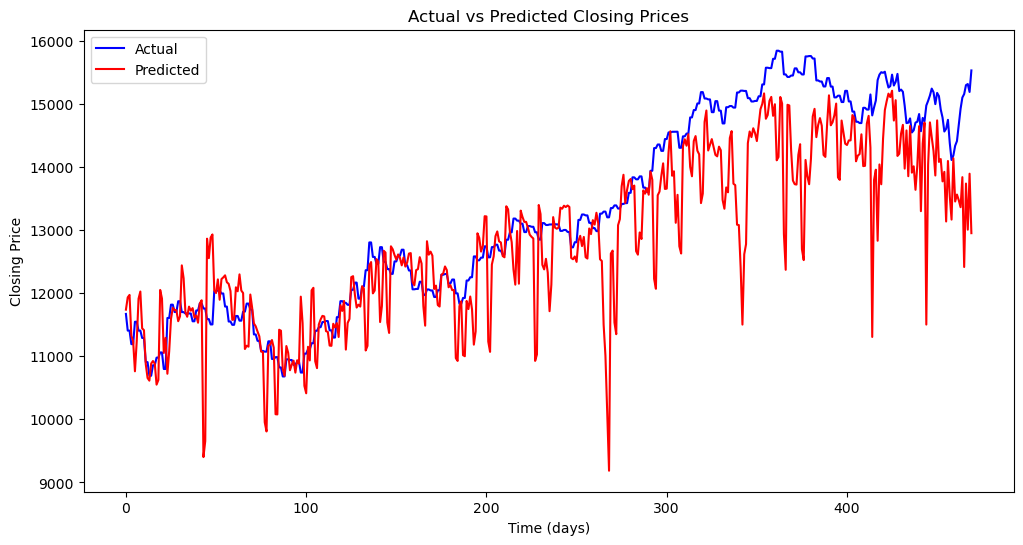

In [106]:
import matplotlib.pyplot as plt

# Assuming y_test is your actual values and y_pred is your model's predictions
# Ensure that y_test and y_pred are in the same format (e.g., both as NumPy arrays or both as Pandas series)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time (days)')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


#### Doing Cross Validation

In [107]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Configure the number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize model
model = RandomForestRegressor(random_state=0)

# Arrays to store scores
mse_scores = []
r2_scores = []

import numpy as np

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Replace NaN values with 0
    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Display results
print("MSE scores per fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("R² scores per fold:", r2_scores)
print("Average R²:", np.mean(r2_scores))


MSE scores per fold: [7413033.93758611, 24196498.27951884, 3859151.806155553, 382213.9133602071, 1004807.1436027589]
Average MSE: 7371141.016044694
R² scores per fold: [-3.7718681811642725, -15.45015977894736, -0.5557051678717542, -0.1874386101084229, -0.15345246330866225]
Average R²: -4.023724840280094


---
## ARIMA Model

In [137]:
X = features
y = values_ts['Close']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)

In [134]:
train_size = 0.7  # 70% of the data for training
test_size = 0.3

split_index = int(len(X) * train_size)

# Split the data into training and testing sets
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [135]:
# Import ARIMA model.
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(endog=y_train.astype(float).dropna(), # endog = Y variable
             order = (0, 2, 0))

/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [128]:
arima_0_2_0 = model.fit()

In [131]:
X_test.tail(10)

Date
2023-10-30    14283.980469
2023-10-31    14340.860352
2023-11-01    14453.679688
2023-11-02    14856.950195
2023-11-03    14985.120117
2023-11-06    15137.160156
2023-11-07    15201.769531
2023-11-08    15313.900391
2023-11-09    15351.120117
2023-11-10    15252.360352
Name: Open, dtype: float64

In [132]:
#preds = arima_0_2_0.predict(start = datetime(2022,10,25), end = datetime(2023,10,30))


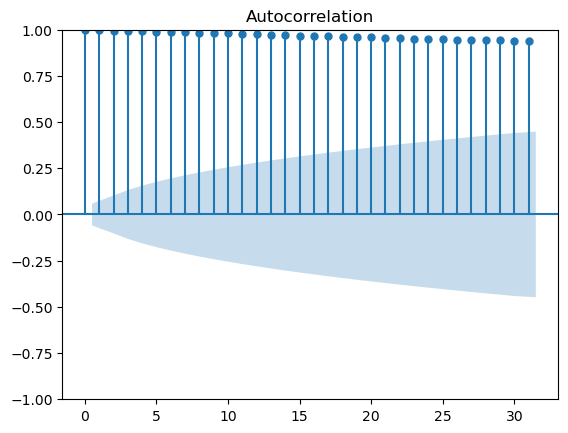

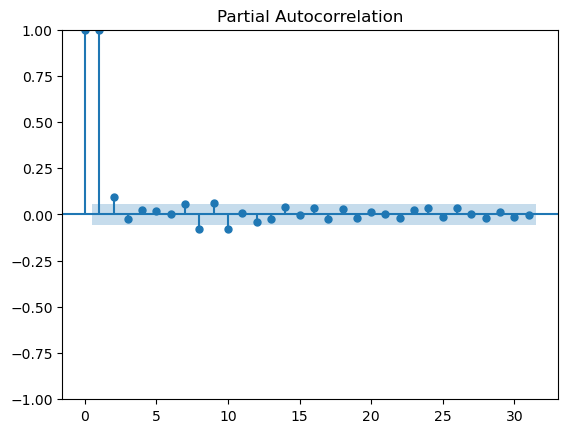

In [139]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming X_train and y_train are your training data

# Step 1: Model Identification
# Plot the ACF and PACF to determine p and q
plot_acf(y_train)
plt.show()

plot_pacf(y_train)
plt.show()

In [140]:
# Based on the plots, determine your p, d, and q values
p = 2 #determined from PACF
d = 0  # since the data is already stationary
q = 0 #determined from ACF

# Step 2: Model Fitting
model = ARIMA(y_train, order=(p, d, q))
model_fit = model.fit()

# Step 3: Model Validation
# Forecast
y_pred = model_fit.forecast(steps=len(y_test))

# You can then compare y_pred with y_test using your preferred metrics

/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an int

In [145]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are your training and test sets for the target variable

# Fit the ARIMA model
model = ARIMA(y_train, order=(2, 0, 0))
model_fit = model.fit()

# Forecast
y_pred = model_fit.forecast(steps=len(y_test))

# Convert predictions and actual values to numpy arrays for easier handling
y_pred_array = np.array(y_pred)
y_test_array = np.array(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_array, y_pred_array)
mae = mean_absolute_error(y_test_array, y_pred_array)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 6038904.409055742
Mean Absolute Error (MAE): 1956.070308704295
Root Mean Squared Error (RMSE): 2457.418240563812


/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an int

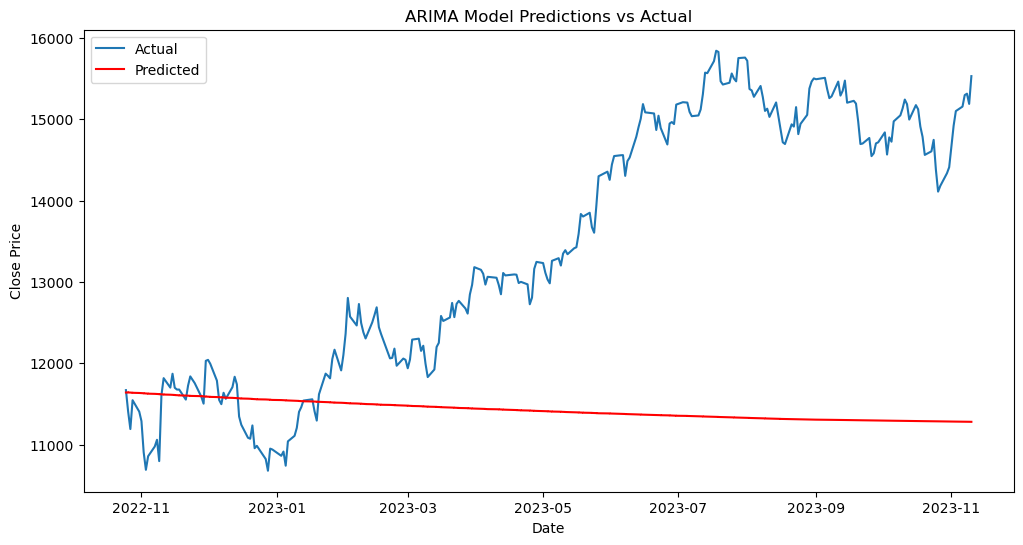

In [146]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are indexed by date

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


---
## VAR Model

In [79]:
values_diff = values_ts[['DayOfWeek', 'OC Difference', 'HL Difference', 'OC %Change', 'HL %Change',
                    'Close_Status', 'Close_Difference', 'Same Bracket','Avg_OC_Spread_10_Day', 'Volatility_10_Day',
                    'Price_Change_Magnitude', 'Price_Direction', 'MA_Volume_Ratio', 'MACD','SignalLine', 
                    'MACD_Histogram', 'first_diff_open', 'first_diff_high',
                    'first_diff_low', 'first_diff_volume', 'first_diff_avg_volume_10_day', 'first_diff_close_bracket',
                    'first_diff_short_ema', 'first_diff_long_ema', 'first_diff_close_lag_1','first_diff_close_lag_2',
                    'first_diff_close_lag_3','first_diff_close_lag_4', 'first_diff_close_lag_5']]

In [80]:
values_diff = values_diff.dropna()
values_diff.index = pd.DatetimeIndex(values_diff.index).to_period('B')


In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
values_diff_scaled = scaler.fit_transform(values_diff)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(values_diff_scaled)

# Create a new DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components,
                      index=values_diff.index)  # Preserving the original index


In [82]:
model = VAR(pca_df)

In [83]:
# Select the optimal lag order based on information criteria
lag_results = model.select_order(maxlags=15)
print(lag_results.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        4.814       4.874       123.3       4.836
1       -18.28      -17.22   1.152e-08      -17.88
2       -24.52      -22.45   2.236e-11      -23.75
3       -27.37      -24.30   1.296e-12      -26.23
4       -28.75     -24.67*   3.272e-13      -27.23
5       -29.61      -24.53   1.382e-13      -27.72
6       -30.58      -24.49   5.245e-14      -28.32
7       -31.09      -23.99   3.171e-14      -28.45
8       -31.71      -23.61   1.711e-14      -28.69
9       -33.70      -24.59   2.345e-15      -30.31
10      -34.69      -24.58   8.701e-16      -30.93
11      -35.11      -23.99   5.796e-16     -30.97*
12      -35.44      -23.32   4.182e-16      -30.93
13      -35.58      -22.45   3.652e-16      -30.70
14     -35.64*      -21.51  3.480e-16*      -30.38
15      -35.62      -20.49   3.569e-16      -29.99
-------------------------------

In [85]:
# Fit the VAR model with the selected number of lags
model_fitted = model.fit(14)

In [86]:
from statsmodels.stats.stattools import durbin_watson

# Perform Durbin-Watson test
dw_results = durbin_watson(model_fitted.resid)

for col, val in zip(pca_df.columns, dw_results):
    print(f'Variable: {col} - DW Statistic: {val}')
# Values close to 2 indicate no serial correlation


Variable: 0 - DW Statistic: 2.008612333871007
Variable: 1 - DW Statistic: 2.0007184410003656
Variable: 2 - DW Statistic: 1.9955862828471411
Variable: 3 - DW Statistic: 1.9914898912508696
Variable: 4 - DW Statistic: 2.0058708405644854
Variable: 5 - DW Statistic: 2.002290420459316
Variable: 6 - DW Statistic: 2.014905248048205
Variable: 7 - DW Statistic: 2.010489641123595
Variable: 8 - DW Statistic: 2.0056811863219663
Variable: 9 - DW Statistic: 2.0109487950326725
Variable: 10 - DW Statistic: 1.9936466056560973
Variable: 11 - DW Statistic: 1.9916002760763825
Variable: 12 - DW Statistic: 1.986661633123789
Variable: 13 - DW Statistic: 2.0037599643639497
Variable: 14 - DW Statistic: 2.0056512247826763
Variable: 15 - DW Statistic: 1.9989149226546448
Variable: 16 - DW Statistic: 1.991466253322221


Model is stable


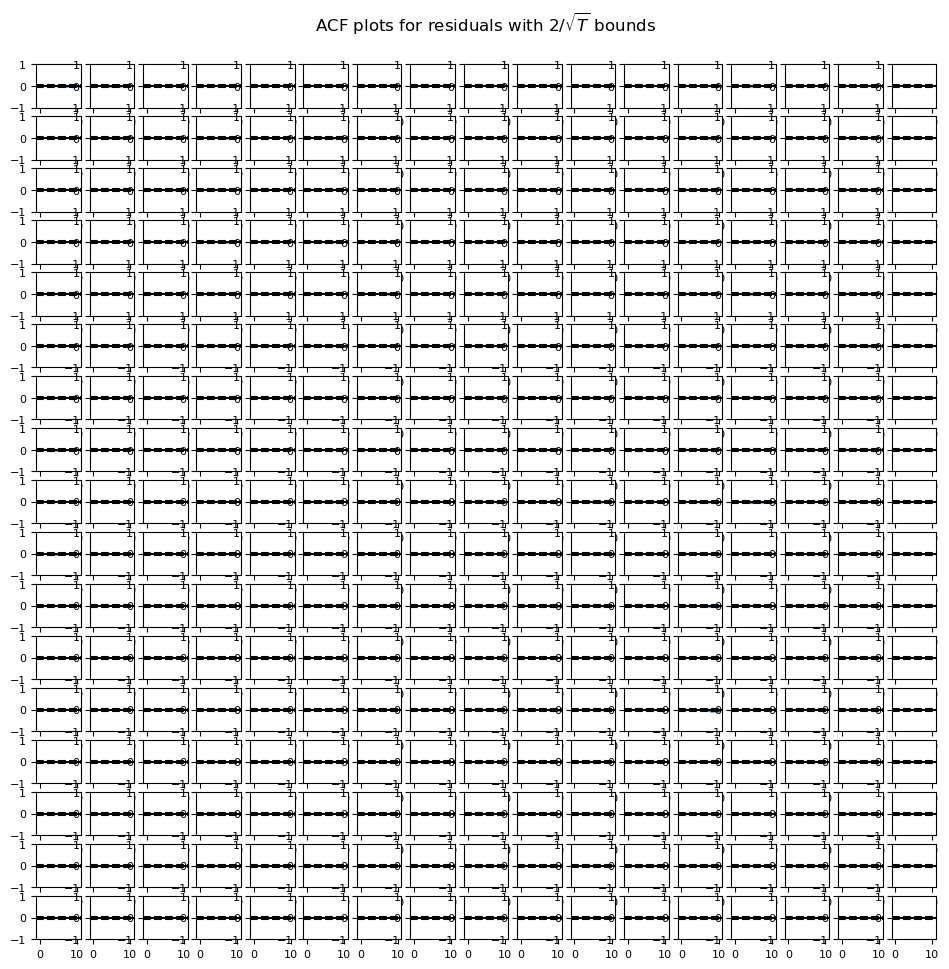

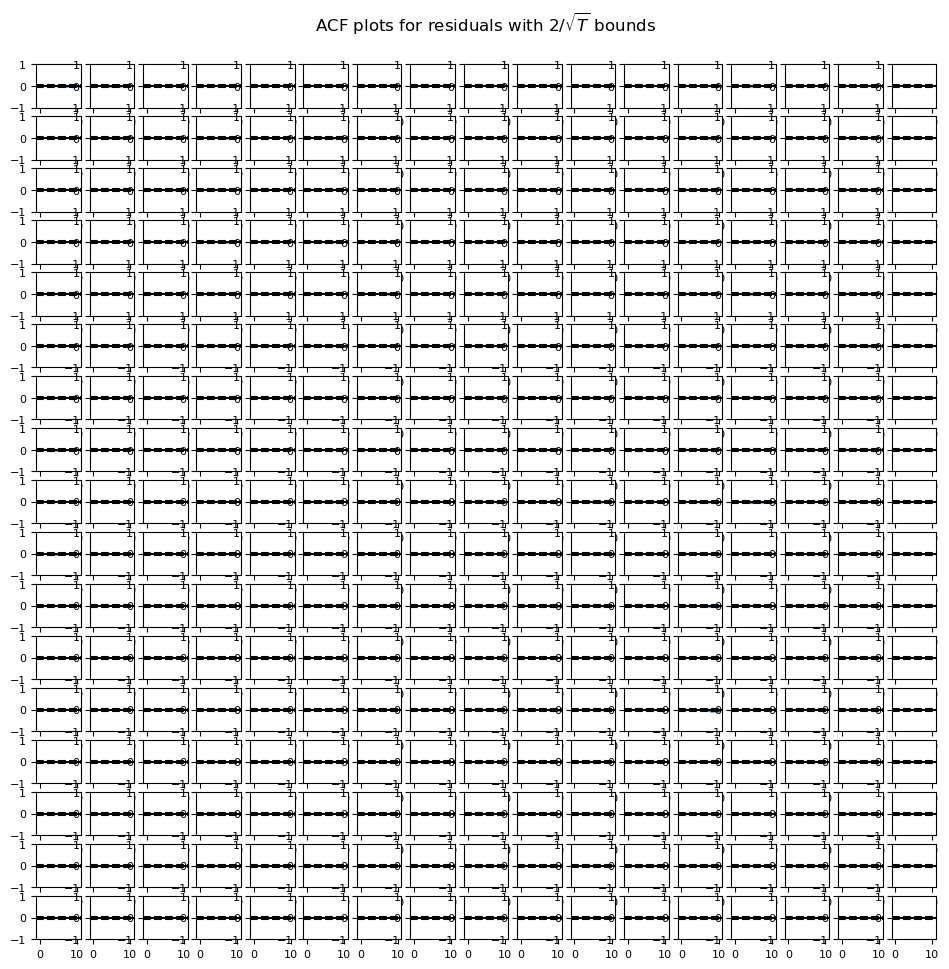

In [87]:
# Check for stability
if model_fitted.is_stable():
    print('Model is stable')
else:
    print('Model is not stable')

# Inverse roots of AR characteristic polynomial
model_fitted.plot_acorr()


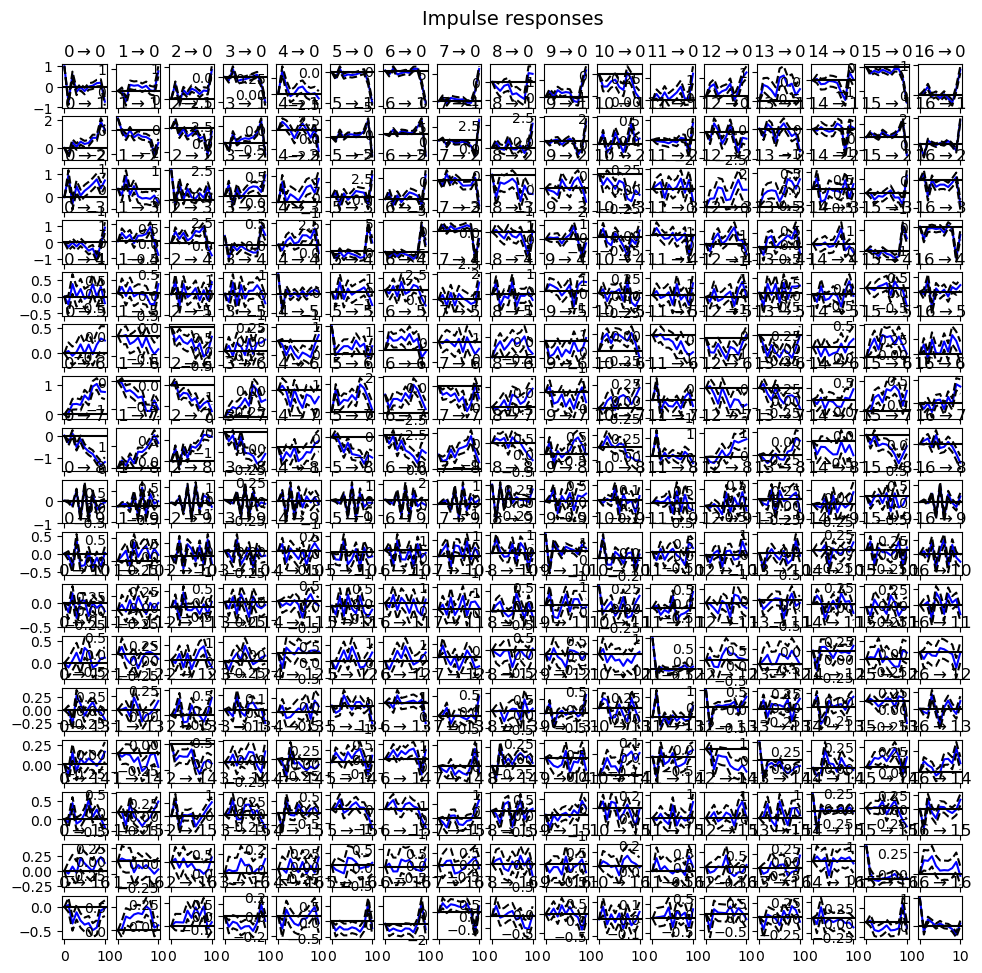

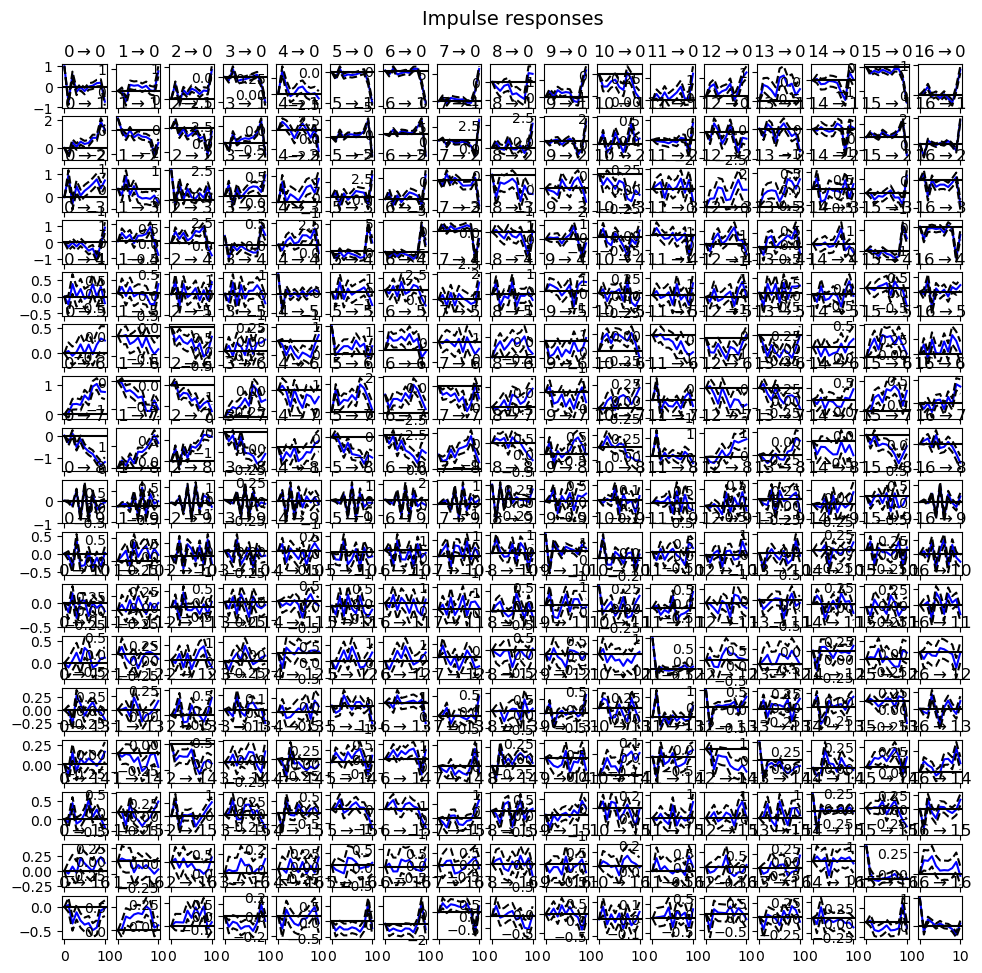

In [88]:
# Impulse response analysis
irf = model_fitted.irf(10)  # 10 periods impulse response
irf.plot(orth=False)  # Set orth=True for orthogonalized impulse response


In [90]:
# Assuming 'model_fitted' is your fitted VAR model from the PCA-transformed data
forecast_steps = 5
# Get the last 'k_ar' observations to start the forecast
last_observations = pca_df.iloc[-model_fitted.k_ar:]

# Generate the forecast
forecast = model_fitted.forecast(last_observations.values, steps=forecast_steps)

# Since the index of 'pca_df' is a PeriodIndex, we should calculate the forecast index differently
last_date = pca_df.index[-1].to_timestamp()  # Convert the last Period to a Timestamp
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # Exclude the start date and add 'forecast_steps' business days

# Create a DataFrame to hold the forecast results
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[f'PC{i}' for i in range(1, pca_df.shape[1] + 1)])


AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

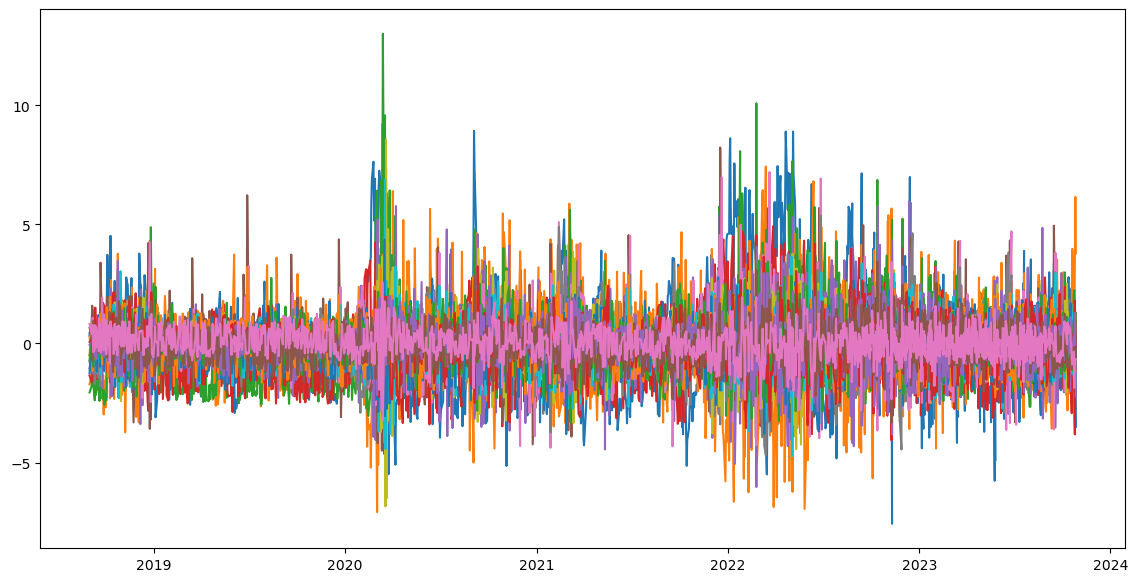

In [94]:
# Convert PeriodIndex to DateTimeIndex for plotting
pca_df.index = pca_df.index.to_timestamp()

# Now proceed with plotting
plt.figure(figsize=(14, 7))
for i in range(pca_df.shape[1]):
    plt.plot(pca_df.index, pca_df.iloc[:, i], label=f'Historical PC{i+1}')

# Ensure forecast_df index is also a DateTimeIndex
forecast_df.index = forecast_df.index.to_timestamp()

# Overlay the forecasted principal component data
for i in range(forecast_df.shape[1]):
    plt.plot(forecast_df.index, forecast_df.iloc[:, i], label=f'Forecast PC{i+1}', linestyle='--')

plt.title('VAR Model Forecast vs Historical Data')
plt.legend()
plt.show()


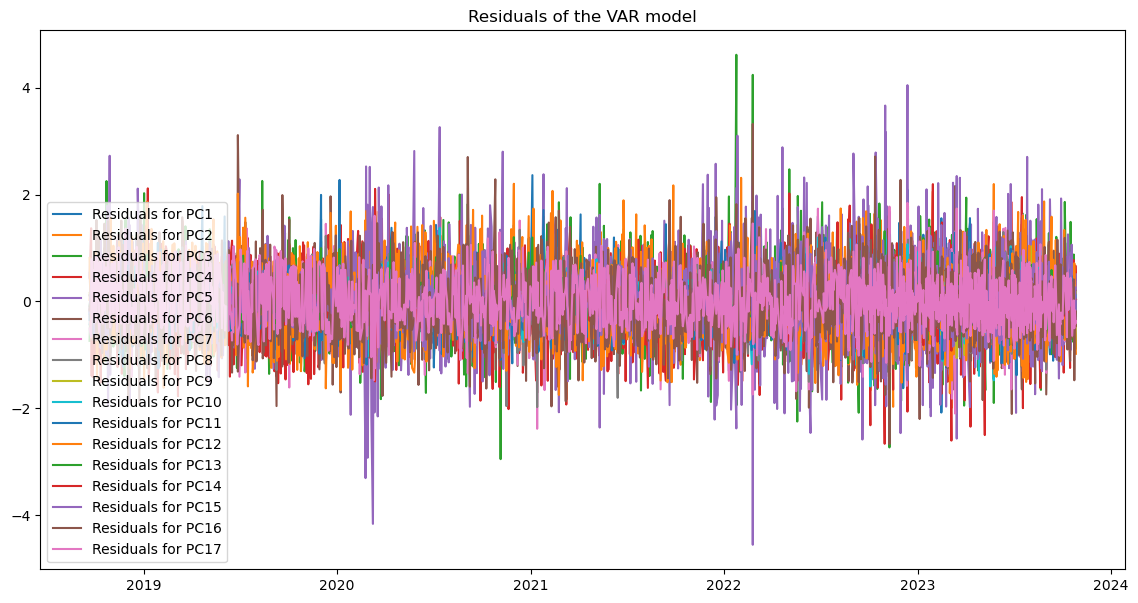

In [97]:
plt.figure(figsize=(14, 7))
for i in range(residuals.shape[1]):
    plt.plot(residuals.index.to_timestamp(), residuals.iloc[:, i], label=f'Residuals for PC{i+1}')
plt.title('Residuals of the VAR model')
plt.legend()
plt.show()


## XGBoost Model
---

In [174]:
xgb_features = ['Open', 'High', 'Low', 'Volume',
       'OC Difference', 'HL Difference', 'OC %Change', 'HL %Change',
       'Close_Status', 'Close_Difference', 'Same Bracket',
       'Avg_OC_Spread_10_Day', 'Avg_Volume_10_Day', 'Volatility_10_Day',
       'Price_Change_Magnitude', 'Price_Direction', 'MA_Volume_Ratio',
       'Close_Bracket', 'Close_Lag_5', 'Close_Lag_4', 'Close_Lag_3',
       'Close_Lag_2', 'Close_Lag_1', 'ShortEMA', 'LongEMA', 'MACD']


In [175]:
X = values_ts[xgb_features]
y = values_ts['Close']

X_train, X_test, y_train, y_split = train_test_split(X,y,test_size=0.3)

# Assuming X_train, X_test, y_train, y_test are already defined
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters
params = {
    'max_depth': 3,  # Depth of each tree
    'eta': 0.1,      # Learning rate
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'  # Metric for evaluation
}
num_rounds = 100

# Train the model
model = xgb.train(params, dtrain, num_rounds)

# Predictions
y_pred_xgb = model.predict(dtest)


XGBoostError: [11:12:27] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/data/data.cc:455: Check failed: this->labels.Size() % this->num_row_ == 0 (5 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012bb08785 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012bb9e41a xgboost::MetaInfo::SetInfoFromHost(xgboost::GenericParameter const&, xgboost::StringView, xgboost::Json) + 4282
  [bt] (2) 3   libxgboost.dylib                    0x000000012bb9d272 xgboost::MetaInfo::SetInfo(xgboost::GenericParameter const&, xgboost::StringView, xgboost::StringView) + 146
  [bt] (3) 4   libxgboost.dylib                    0x000000012bb1ee69 XGDMatrixSetInfoFromInterface + 233
  [bt] (4) 5   libffi.7.dylib                      0x00000001076c5ead ffi_call_unix64 + 85
  [bt] (5) 6   ???                                 0x00007ff7b8cdf070 0x0 + 140701934153840



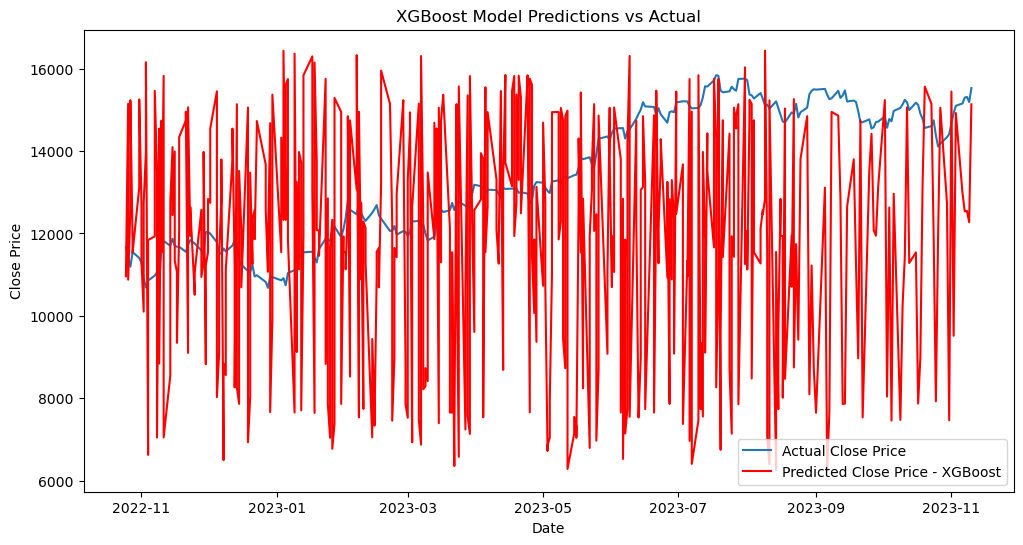

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price')
plt.plot(y_test.index, y_pred_xgb, label='Predicted Close Price - XGBoost', color='red')
plt.title('XGBoost Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [158]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost - Mean Squared Error (MSE):", mse_xgb)
print("XGBoost - Mean Absolute Error (MAE):", mae_xgb)
print("XGBoost - Root Mean Squared Error (RMSE):", rmse_xgb)

XGBoost - Mean Squared Error (MSE): 13170672.789981429
XGBoost - Mean Absolute Error (MAE): 2869.938341506649
XGBoost - Root Mean Squared Error (RMSE): 3629.1421562101186


## LSTM Model

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

X = values_ts[xgb_features]
y = values_ts['Close']

#X = X.dropna()

X_train, X_test, y_train, y_split = train_test_split(X,y,test_size=0.3)

# Convert DataFrame to NumPy array and then reshape
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Predictions
y_pred_lstm = model.predict(X_test_reshaped)
# Reshape y_pred_lstm if necessary
y_pred_lstm = y_pred_lstm.reshape(-1)

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/100
27/35 [======================>.......] - ETA: 0s - loss: nan

KeyboardInterrupt: 

In [166]:
import numpy as np

# Assuming y_pred_lstm and y_test are numpy arrays
nan_count_pred = np.isnan(y_pred_lstm).sum()
nan_count_test = np.isnan(y_test).sum()

print("Number of NaNs in y_pred_lstm:", nan_count_pred)
print("Number of NaNs in y_test:", nan_count_test)


Number of NaNs in y_pred_lstm: 470
Number of NaNs in y_test: 0


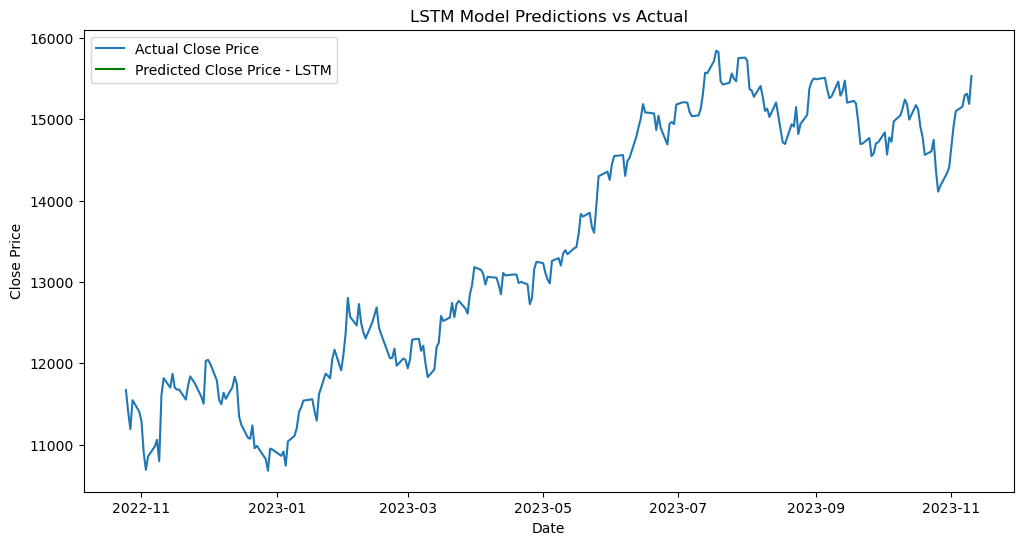

In [160]:
# Plot for LSTM Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price')
plt.plot(y_test.index, y_pred_lstm, label='Predicted Close Price - LSTM', color='green')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [161]:
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print("\nLSTM - Mean Squared Error (MSE):", mse_lstm)
print("LSTM - Mean Absolute Error (MAE):", mae_lstm)
print("LSTM - Root Mean Squared Error (RMSE):", rmse_lstm)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').